In [ ]:
try:
  %tensorflow_version 2.x # Colab only
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
# load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
type(data.data)

numpy.ndarray

In [ ]:
print(data.data.shape)

(569, 30)


In [ ]:
print(data.target.shape) # Binary problem

data.target_names

(569,)


array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape

In [ ]:
print(N, D)

381 30


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

Epoch 1/100
12/12 [==============================] - 2s 48ms/step - loss: 0.3799 - accuracy: 0.8635 - val_loss: 0.3651 - val_accuracy: 0.8936
Epoch 2/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3446 - accuracy: 0.8950 - val_loss: 0.3316 - val_accuracy: 0.9096
Epoch 3/100
12/12 [==============================] - 0s 14ms/step - loss: 0.3141 - accuracy: 0.9108 - val_loss: 0.3047 - val_accuracy: 0.9255
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2894 - accuracy: 0.9160 - val_loss: 0.2826 - val_accuracy: 0.9362
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 0.2696 - accuracy: 0.9265 - val_loss: 0.2640 - val_accuracy: 0.9415
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.2526 - accuracy: 0.9291 - val_loss: 0.2488 - val_accuracy: 0.9521
Epoch 7/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2385 - accuracy: 0.9344 - val_loss: 0.2361 - val_accuracy: 0.9574
Epoch 8/100

In [ ]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.evaluate(X_train, y_train)

12/12 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.9816


[0.0818357914686203, 0.9816272854804993]

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.0849 - accuracy: 0.9787


[0.08486314862966537, 0.978723406791687]

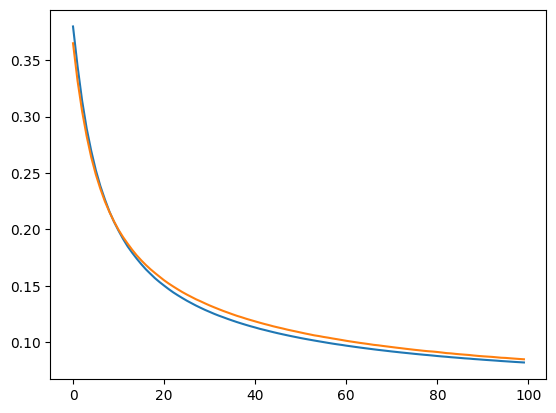

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

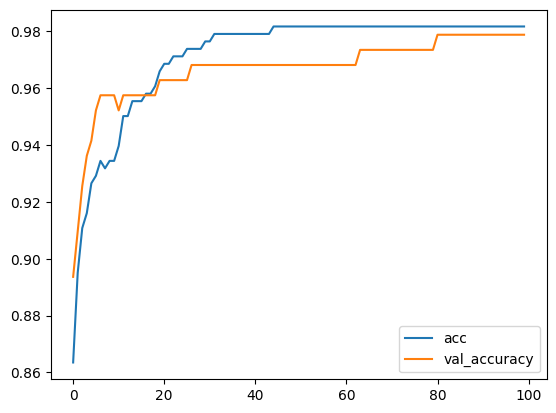

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();

# REGRESSION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2024-01-05 21:03:25--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2024-01-05 21:03:25 (34.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv('/content/moore.csv', header=None).to_numpy()

In [ ]:
X = data[:,0].reshape(-1,1) # making an N x D

In [ ]:
X.shape

(162, 1)

In [ ]:
y = data[:,1]

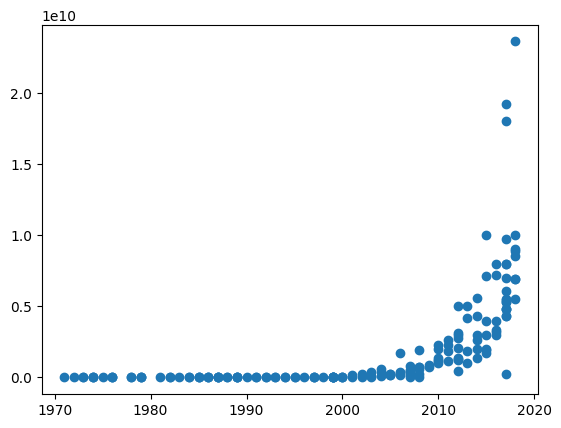

In [ ]:
plt.scatter(X,y)

In [ ]:
y = np.log(y)

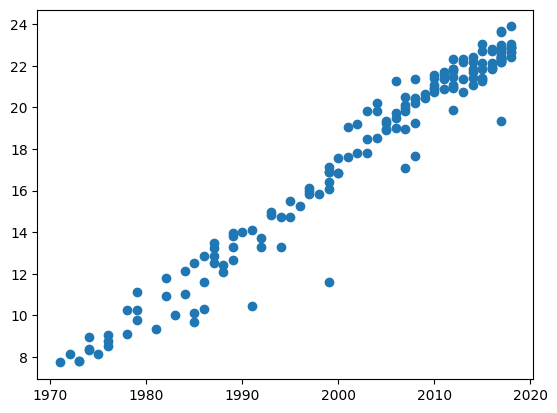

In [ ]:
plt.scatter(X,y)

In [ ]:
X = X - X.mean()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 6ms/step - loss: 661.8077 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 508.9468 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 319.4494 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 198.4636 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 154.1995 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 115.9454 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 92.7581 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 71.1327 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 61.3738 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 5ms/step - loss: 77.5351 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 6ms/step - loss: 6

# PLOT THE LOSS

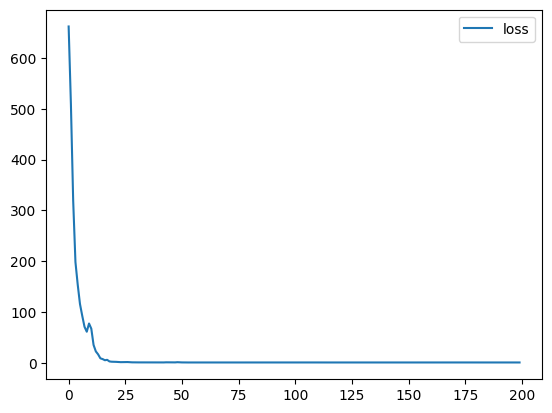

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.legend()

In [ ]:
model.layers

In [ ]:
model.layers[0].get_weights()

[array([[0.34043545]], dtype=float32), array([17.764048], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(y) - y.mean() * X.sum()) / denominator
b = ( y.mean() * X.dot(X) - X.mean() * X.dot(y)) / denominator

In [ ]:
print(a, b)

0.341682487387313 17.764939393631764


In [ ]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0286295205239204
